In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

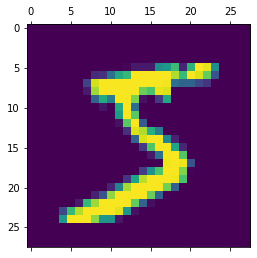

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

In [10]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [11]:
model = keras.Sequential([
    # output, input, activation
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid') 
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 648us/step - loss: 9.7062 - accuracy: 0.8405
Epoch 2/5
1875/1875 [==============================] - 1s 666us/step - loss: 6.2021 - accuracy: 0.8791
Epoch 3/5
1875/1875 [==============================] - 1s 694us/step - loss: 5.7632 - accuracy: 0.8838
Epoch 4/5
1875/1875 [==============================] - 1s 708us/step - loss: 5.5470 - accuracy: 0.8846
Epoch 5/5
1875/1875 [==============================] - 1s 718us/step - loss: 5.4103 - accuracy: 0.8856


In [12]:
#scaling data to improve accuracy
X_train_flattened = X_train_flattened/255
X_test_flattened = X_test_flattened/255

In [13]:
model = keras.Sequential([
    # output, input, activation
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid') 
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 787us/step - loss: 0.4687 - accuracy: 0.8779
Epoch 2/5
1875/1875 [==============================] - 1s 768us/step - loss: 0.3038 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 1s 777us/step - loss: 0.2829 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 2s 818us/step - loss: 0.2727 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 2s 852us/step - loss: 0.2664 - accuracy: 0.9254


In [14]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 557us/step - loss: 0.2727 - accuracy: 0.9244


[0.2726759612560272, 0.9243999719619751]

In [15]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.89835727e-02, 2.06206593e-07, 3.60487700e-02, 9.42987800e-01,
       1.77234411e-03, 1.33052945e-01, 1.24396809e-06, 9.99832153e-01,
       1.19778335e-01, 6.75298691e-01], dtype=float32)

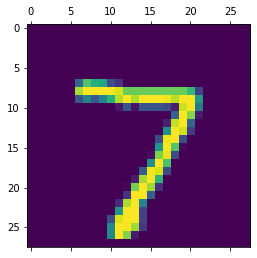

In [16]:
plt.matshow(X_test[0])

In [17]:
# np.argmax finds a maximum element from an array and returns the index of it
np.argmax(y_predicted[0])

7

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [19]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [20]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    0,    1,    0,    6,    6,    4,    4,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   7,    8,  910,   13,    8,    6,   12,   13,   53,    2],
       [   4,    0,   14,  897,    0,   43,    2,   13,   31,    6],
       [   2,    1,    3,    1,  916,    0,    9,    6,   11,   33],
       [   9,    3,    3,   20,    7,  793,   10,    7,   33,    7],
       [  11,    3,    9,    0,    7,   19,  902,    2,    5,    0],
       [   2,    6,   20,    3,    5,    0,    0,  964,    4,   24],
       [   5,    6,    5,   14,    9,   22,    8,   12,  888,    5],
       [  10,    5,    1,    9,   26,    8,    0,   33,   12,  905]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

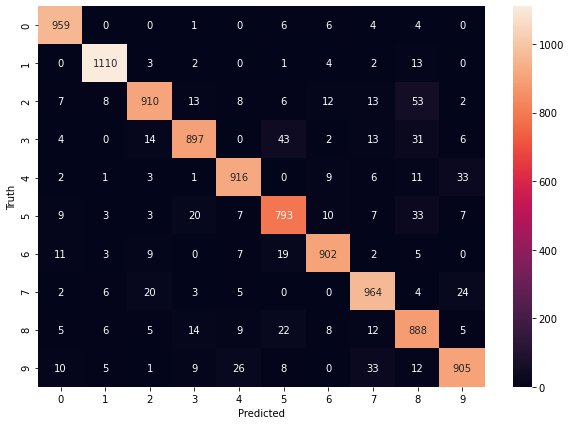

In [21]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2714 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1224 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0846 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0633 - accuracy: 0.9810
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0496 - accuracy: 0.9840


In [23]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 795us/step - loss: 0.0768 - accuracy: 0.9759


[0.0768323764204979, 0.9758999943733215]

Text(69.0, 0.5, 'Truth')

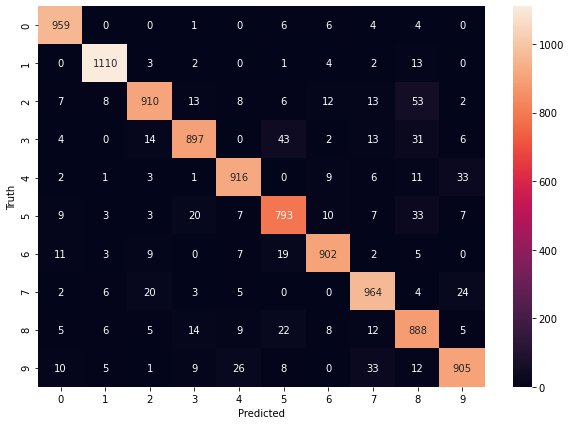

In [24]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
# Using inbuilt flatten

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1887 - accuracy: 0.8296
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4113 - accuracy: 0.9027
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2942 - accuracy: 0.9250
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2523 - accuracy: 0.9350
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2359 - accuracy: 0.9408
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2130 - accuracy: 0.9463
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2002 - accuracy: 0.9498
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1895 - accuracy: 0.9535
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1957 - accuracy: 0.9525
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.189

In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2439 - accuracy: 0.9472


[0.24391406774520874, 0.9472000002861023]